In [121]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import numpy as np

#Load the dataset into a dataframe
df = pd.read_csv("C://Users/jesel sequeira/Downloads/finalest.csv")

In [122]:
print(df.head())

         Date Company      Open      High       Low     Close     Volume  \
0  1980-12-12     JNJ  0.644482  0.669556  0.644482  0.669556  5011200.0   
1  1980-12-15     JNJ  0.669556  0.688129  0.668627  0.677914  5932800.0   
2  1980-12-16     JNJ  0.677914  0.707631  0.676056  0.704845  9475200.0   
3  1980-12-17     JNJ  0.705773  0.713202  0.705773  0.709487  6801600.0   
4  1980-12-18     JNJ  0.709488  0.715989  0.703916  0.706702  4603200.0   

       Sector  EMA_50  EMA_200  RSI  MACD  MACD_Signal  MACD_Hist  Season  
0  Healthcare     NaN      NaN  NaN   NaN          NaN        NaN  Winter  
1  Healthcare     NaN      NaN  NaN   NaN          NaN        NaN  Winter  
2  Healthcare     NaN      NaN  NaN   NaN          NaN        NaN  Winter  
3  Healthcare     NaN      NaN  NaN   NaN          NaN        NaN  Winter  
4  Healthcare     NaN      NaN  NaN   NaN          NaN        NaN  Winter  


In [123]:
print(df.tail())

               Date Company   Open   High    Low  Close  Volume Sector  \
1425677  2024-06-13     FVX  4.307  4.307  4.216  4.234     0.0  Index   
1425678  2024-06-14     FVX  4.205  4.245  4.196  4.226     0.0  Index   
1425679  2024-06-17     FVX  4.275  4.308  4.272  4.300     0.0  Index   
1425680  2024-06-18     FVX  4.308  4.312  4.224  4.234     0.0  Index   
1425681  2024-06-20     FVX  4.255  4.306  4.246  4.266     0.0  Index   

           EMA_50   EMA_200        RSI      MACD  MACD_Signal  MACD_Hist  \
1425677  4.436860  4.291307  37.068290 -0.045805    -0.025537  -0.020268   
1425678  4.428591  4.290657  36.695882 -0.055544    -0.031539  -0.024005   
1425679  4.423548  4.290750  42.454715 -0.056638    -0.036558  -0.020079   
1425680  4.416115  4.290186  39.043233 -0.062115    -0.041670  -0.020445   
1425681  4.410228  4.289945  41.497798 -0.063145    -0.045965  -0.017180   

         Season  
1425677  Summer  
1425678  Summer  
1425679  Summer  
1425680  Summer  
1425681 

In [124]:
# Step 2: Initial Exploration
# Get basic information about the dataset
print(df.info())

# Get summary statistics for numerical columns
print(df.describe())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1425682 entries, 0 to 1425681
Data columns (total 15 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Date         1425682 non-null  object 
 1   Company      1425682 non-null  object 
 2   Open         1009641 non-null  float64
 3   High         1009641 non-null  float64
 4   Low          1009641 non-null  float64
 5   Close        1009641 non-null  float64
 6   Volume       1009641 non-null  float64
 7   Sector       1009641 non-null  object 
 8   EMA_50       1026693 non-null  float64
 9   EMA_200      1007919 non-null  float64
 10  RSI          1424031 non-null  float64
 11  MACD         1029699 non-null  float64
 12  MACD_Signal  1028699 non-null  float64
 13  MACD_Hist    1028699 non-null  float64
 14  Season       1425682 non-null  object 
dtypes: float64(11), object(4)
memory usage: 163.2+ MB
None
               Open          High           Low         Close        Volume  \


In [125]:
# Check for missing values
print(df.isnull().sum())

Date                0
Company             0
Open           416041
High           416041
Low            416041
Close          416041
Volume         416041
Sector         416041
EMA_50         398989
EMA_200        417763
RSI              1651
MACD           395983
MACD_Signal    396983
MACD_Hist      396983
Season              0
dtype: int64


In [126]:
#dropping the null values
df.dropna(inplace=True)

In [127]:
# Check for missing values
print(df.isnull().sum())

Date           0
Company        0
Open           0
High           0
Low            0
Close          0
Volume         0
Sector         0
EMA_50         0
EMA_200        0
RSI            0
MACD           0
MACD_Signal    0
MACD_Hist      0
Season         0
dtype: int64


In [128]:
#checking duplicate values
df.duplicated().sum()

0

In [129]:
print(df.dtypes)

Date            object
Company         object
Open           float64
High           float64
Low            float64
Close          float64
Volume         float64
Sector          object
EMA_50         float64
EMA_200        float64
RSI            float64
MACD           float64
MACD_Signal    float64
MACD_Hist      float64
Season          object
dtype: object


In [130]:
#data types conversion
df['Date'] = pd.to_datetime(df['Date'])

In [131]:
#printing the information after type conversion
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 984766 entries, 199 to 1425681
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Date         984766 non-null  datetime64[ns]
 1   Company      984766 non-null  object        
 2   Open         984766 non-null  float64       
 3   High         984766 non-null  float64       
 4   Low          984766 non-null  float64       
 5   Close        984766 non-null  float64       
 6   Volume       984766 non-null  float64       
 7   Sector       984766 non-null  object        
 8   EMA_50       984766 non-null  float64       
 9   EMA_200      984766 non-null  float64       
 10  RSI          984766 non-null  float64       
 11  MACD         984766 non-null  float64       
 12  MACD_Signal  984766 non-null  float64       
 13  MACD_Hist    984766 non-null  float64       
 14  Season       984766 non-null  object        
dtypes: datetime64[ns](1), float64(11), o

In [132]:
#checking the shape of the dataset
print(df.shape)

(984766, 15)


In [133]:
# Step 3: Feature Engineering

# 1. Date Features
df['Day_of_Week'] = df['Date'].dt.dayofweek
df['Month'] = df['Date'].dt.month
# df['Quarter'] = df['Date'].dt.quarter
df['Year'] = df['Date'].dt.year

In [134]:
# 2. Price Movement Indicators
# Computes relative differences between Close vs. Open and High vs. Low, which can indicate intraday volatility.
df['Close_vs_Open'] = (df['Close'] - df['Open']) / df['Open']
df['High_vs_Low'] = (df['High'] - df['Low']) / df['Low']

In [135]:
# 3. Technical Indicators (Example: RSI-based feature)
# Generates an RSI_Signal based on the Relative Strength Index (RSI), categorizing it as 'Overbought', 'Oversold', or 'Normal'.
import numpy as np
df['RSI_Signal'] = np.where(df['RSI'] > 70, 'Overbought', np.where(df['RSI'] < 30, 'Oversold', 'Normal'))

# Create a new feature for the previous day's closing price (Feature Engineering)
df['Previous_Close'] = df['Close'].shift(1)
df.head(15)

,Date,Company,Open,High,Low,Close,Volume,Sector,EMA_50,EMA_200,...,MACD_Signal,MACD_Hist,Season,Day_of_Week,Month,Year,Close_vs_Open,High_vs_Low,RSI_Signal,Previous_Close
199,1981-09-28,JNJ,0.712674,0.760942,0.695638,0.755264,6104000.0,Healthcare,0.717779,0.738779,...,-0.002900,0.006665,Fall,0,9,1981,0.059761,0.093877,Normal,NaN
200,1981-09-29,JNJ,0.755264,0.760942,0.746746,0.755264,3820800.0,Healthcare,0.719249,0.738943,...,-0.000908,0.007971,Fall,1,9,1981,0.000000,0.019011,Normal,0.755264
201,1981-09-30,JNJ,0.755263,0.755263,0.743906,0.749585,2113600.0,Healthcare,0.720439,0.739049,...,0.001097,0.008017,Fall,2,9,1981,-0.007519,0.015267,Normal,0.755264
202,1981-10-01,JNJ,0.749585,0.766621,0.746746,0.766621,3516800.0,Healthcare,0.722250,0.739323,...,0.003272,0.008704,Fall,3,10,1981,0.022727,0.026616,Normal,0.749585
203,1981-10-02,JNJ,0.766621,0.775139,0.760942,0.763781,7587200.0,Healthcare,0.723879,0.739566,...,0.005389,0.008466,Fall,4,10,1981,-0.003703,0.018657,Normal,0.766621
204,1981-10-05,JNJ,0.760942,0.760942,0.741067,0.746746,3564800.0,Healthcare,0.724775,0.739638,...,0.007073,0.006738,Fall,0,10,1981,-0.018656,0.026820,Normal,0.763781
205,1981-10-06,JNJ,0.746746,0.749585,0.735389,0.738228,2441600.0,Healthcare,0.725303,0.739624,...,0.008247,0.004693,Fall,1,10,1981,-0.011407,0.019305,Normal,0.746746
206,1981-10-07,JNJ,0.738228,0.766621,0.735389,0.766621,2910400.0,Healthcare,0.726923,0.739892,...,0.009472,0.004902,Fall,2,10,1981,0.038462,0.042471,Normal,0.738228
207,1981-10-08,JNJ,0.766621,0.795015,0.763782,0.795015,3563200.0,Healthcare,0.729594,0.740441,...,0.011098,0.006502,Fall,3,10,1981,0.037037,0.040892,Normal,0.766621
208,1981-10-09,JNJ,0.795014,0.795014,0.772299,0.777978,5497600.0,Healthcare,0.731491,0.740814,...,0.012591,0.005975,Fall,4,10,1981,-0.021429,0.029412,Normal,0.795015


In [136]:
df.isnull().sum()

Date              0
Company           0
Open              0
High              0
Low               0
Close             0
Volume            0
Sector            0
EMA_50            0
EMA_200           0
RSI               0
MACD              0
MACD_Signal       0
MACD_Hist         0
Season            0
Day_of_Week       0
Month             0
Year              0
Close_vs_Open     0
High_vs_Low       0
RSI_Signal        0
Previous_Close    1
dtype: int64

In [137]:
# Drop the first row with NaN value introduced by the shift operation
df = df.dropna()
df.head(15)

,Date,Company,Open,High,Low,Close,Volume,Sector,EMA_50,EMA_200,...,MACD_Signal,MACD_Hist,Season,Day_of_Week,Month,Year,Close_vs_Open,High_vs_Low,RSI_Signal,Previous_Close
200,1981-09-29,JNJ,0.755264,0.760942,0.746746,0.755264,3820800.0,Healthcare,0.719249,0.738943,...,-0.000908,0.007971,Fall,1,9,1981,0.000000,0.019011,Normal,0.755264
201,1981-09-30,JNJ,0.755263,0.755263,0.743906,0.749585,2113600.0,Healthcare,0.720439,0.739049,...,0.001097,0.008017,Fall,2,9,1981,-0.007519,0.015267,Normal,0.755264
202,1981-10-01,JNJ,0.749585,0.766621,0.746746,0.766621,3516800.0,Healthcare,0.722250,0.739323,...,0.003272,0.008704,Fall,3,10,1981,0.022727,0.026616,Normal,0.749585
203,1981-10-02,JNJ,0.766621,0.775139,0.760942,0.763781,7587200.0,Healthcare,0.723879,0.739566,...,0.005389,0.008466,Fall,4,10,1981,-0.003703,0.018657,Normal,0.766621
204,1981-10-05,JNJ,0.760942,0.760942,0.741067,0.746746,3564800.0,Healthcare,0.724775,0.739638,...,0.007073,0.006738,Fall,0,10,1981,-0.018656,0.026820,Normal,0.763781
205,1981-10-06,JNJ,0.746746,0.749585,0.735389,0.738228,2441600.0,Healthcare,0.725303,0.739624,...,0.008247,0.004693,Fall,1,10,1981,-0.011407,0.019305,Normal,0.746746
206,1981-10-07,JNJ,0.738228,0.766621,0.735389,0.766621,2910400.0,Healthcare,0.726923,0.739892,...,0.009472,0.004902,Fall,2,10,1981,0.038462,0.042471,Normal,0.738228
207,1981-10-08,JNJ,0.766621,0.795015,0.763782,0.795015,3563200.0,Healthcare,0.729594,0.740441,...,0.011098,0.006502,Fall,3,10,1981,0.037037,0.040892,Normal,0.766621
208,1981-10-09,JNJ,0.795014,0.795014,0.772299,0.777978,5497600.0,Healthcare,0.731491,0.740814,...,0.012591,0.005975,Fall,4,10,1981,-0.021429,0.029412,Normal,0.795015
209,1981-10-12,JNJ,0.777978,0.786496,0.775139,0.777978,2102400.0,Healthcare,0.733314,0.741184,...,0.013896,0.005217,Fall,0,10,1981,0.000000,0.014652,Normal,0.777978


In [138]:
# Step 4: Encoding Categorical Variables
label_encoders = {}
for col in ['Company', 'Sector', 'Season']:
    label_encoders[col] = LabelEncoder()
    df[col + '_Encoded'] = label_encoders[col].fit_transform(df[col])

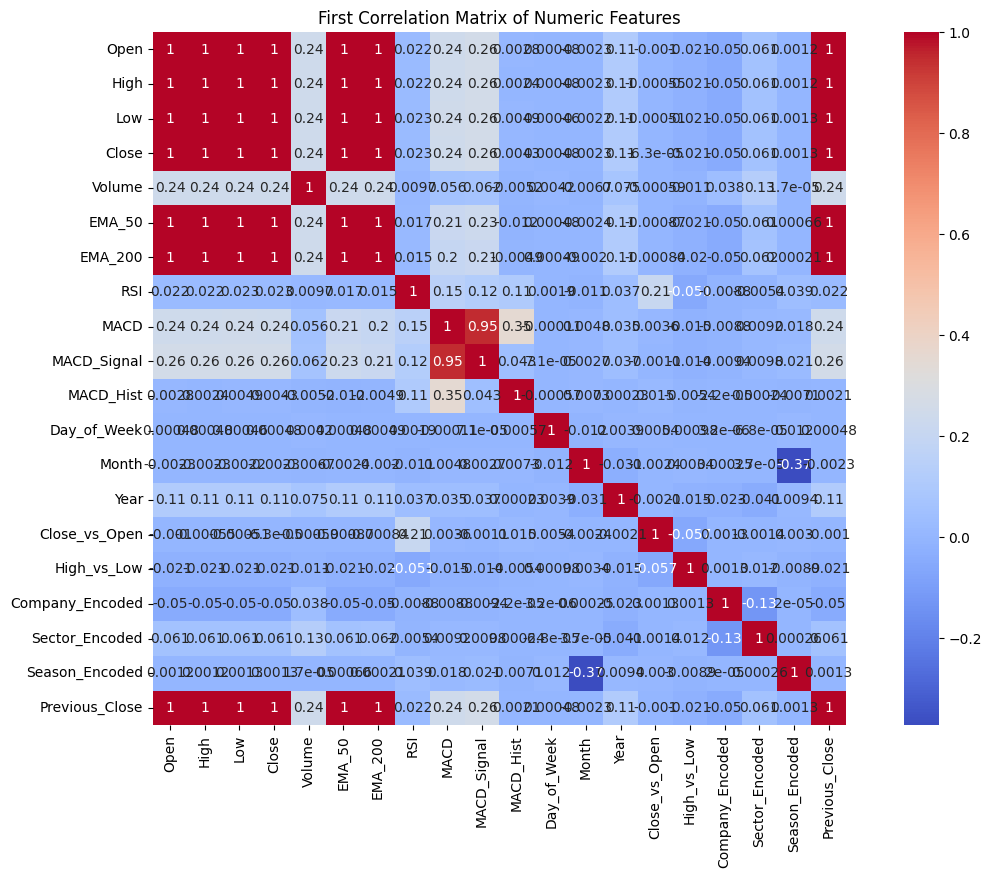

In [139]:
all_cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'EMA_50', 'EMA_200', 'RSI', 'MACD', 'MACD_Signal', 'MACD_Hist',
                'Day_of_Week', 'Month', 'Year', 'Close_vs_Open', 'High_vs_Low', 'Company_Encoded', 'Sector_Encoded', 'Season_Encoded','Previous_Close']


# Compute the correlation matrix
correlation_matrix = df[all_cols].corr()

# Plot the correlation matrix using seaborn
plt.figure(figsize=(15, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('First Correlation Matrix of Numeric Features')
plt.show()

In [140]:
# Drop the unnecessary columns
final_df = df.drop(columns=['Date','Company','Open','High','Low','Volume','Day_of_Week','Month','Year','Close_vs_Open','High_vs_Low','Company_Encoded','Sector_Encoded','Season_Encoded','Sector','Season','RSI_Signal'])
final_df

,Close,EMA_50,EMA_200,RSI,MACD,MACD_Signal,MACD_Hist,Previous_Close
200,0.755264,0.719249,0.738943,64.700384,0.007063,-0.000908,0.007971,0.755264
201,0.749585,0.720439,0.739049,62.381593,0.009114,0.001097,0.008017,0.755264
202,0.766621,0.722250,0.739323,66.285139,0.011976,0.003272,0.008704,0.749585
203,0.763781,0.723879,0.739566,65.073075,0.013856,0.005389,0.008466,0.766621
204,0.746746,0.724775,0.739638,58.197656,0.013811,0.007073,0.006738,0.763781
...,...,...,...,...,...,...,...,...
1425677,4.234000,4.436860,4.291307,37.068290,-0.045805,-0.025537,-0.020268,4.302000
1425678,4.226000,4.428591,4.290657,36.695882,-0.055544,-0.031539,-0.024005,4.234000
1425679,4.300000,4.423548,4.290750,42.454715,-0.056638,-0.036558,-0.020079,4.226000
1425680,4.234000,4.416115,4.290186,39.043233,-0.062115,-0.041670,-0.020445,4.300000


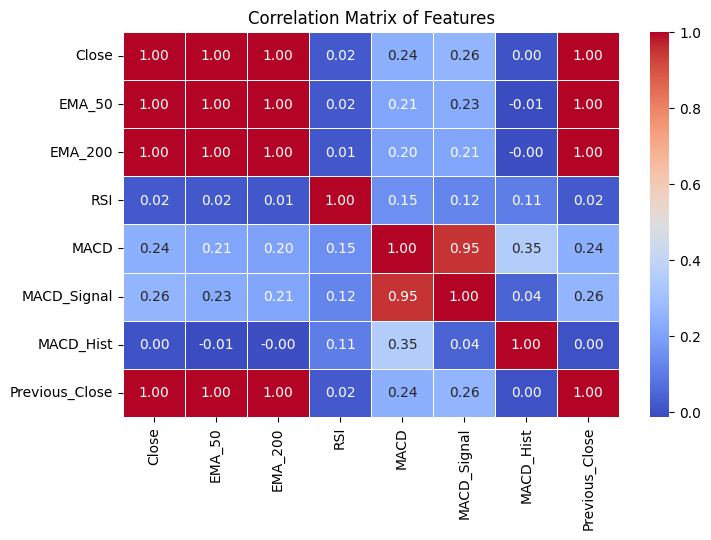

In [141]:

# Calculate the correlation matrix
correlation_matrix = final_df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

In [142]:
# Use all columns except 'Close' as features for X
# features = df.columns.tolist()
features = ['EMA_50', 'EMA_200', 'RSI', 'MACD', 'MACD_Signal', 'MACD_Hist']
# features.remove('Close')

# Prepare X and Y
X = df[features].values
Y = df['Close'].values


In [143]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler
# Normalize the dataset
scaler_X = MinMaxScaler(feature_range=(0, 1))
scaler_Y = MinMaxScaler(feature_range=(0, 1))

X_scaled = scaler_X.fit_transform(X)
Y_scaled = scaler_Y.fit_transform(Y.reshape(-1, 1))


In [144]:
#  Step 6: Data Splitting
from sklearn.model_selection import train_test_split
Target_Variable='Close'
# Assuming 'final_df' contains your selected features and target variable
X = final_df.drop(columns=[Target_Variable])  # Features
y = final_df[Target_Variable]  # Target variable

# Split data into training and test sets (adjust test_size and random_state as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
